<a href="https://colab.research.google.com/github/srehaag/legal_info_tech_w26/blob/main/lesson_3_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3 Videos

### Pandas dataframes

In [ ]:
judges_url = 'https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(judges_url)
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df.head()

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."


In [ ]:
df.columns

for col in df.columns:
    print(col)

Names of Judges
Date of Appointment
Date of Departure
bio_link
bio


In [ ]:
df.describe()

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
count,90,90,82,90,90
unique,90,81,81,90,90
top,The Hon. William Johnstone Ritchie,1875-09-30,2004-06-30,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
freq,1,5,2,1,1


In [ ]:
len(df)

90

In [ ]:
df['bio']

,bio
0,William Johnstone Ritchie was born in Annapoli...
1,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier was born in Saint-François...
4,"William Alexander Henry was born in Halifax, N..."
...,...
85,"Born and raised in Montréal, Justice Sheilah L..."
86,Justice Nicholas Kasirer graduated from McGil...
87,Justice Mahmud Jamal was appointed to the Sup...
88,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
# iterate over df['bio'] and print each bio

for bio in df['bio']:
    print(bio)
    print()
    print()


William Johnstone Ritchie was born in Annapolis, Nova Scotia, on October 28, 1813. He was the son of Thomas Ritchie and Elizabeth Wildman Johnstone. After graduating from the Pictou Academy, he studied law in Halifax in the office of his brother, John William Ritchie. He was called to the bar of Nova Scotia in 1837 but moved to Saint John, New Brunswick, and was called to the bar of that province the following year. In 1846 he was elected to the Legislative Assembly of New Brunswick. In keeping with his pledge to resign if a fellow Liberal candidate failed to win a by-election, he gave up his seat in 1851, only to be re-elected three years later. In 1855 he left politics to accept an appointment to the Supreme Court of New Brunswick, and 10 years later he was named Chief Justice of New Brunswick. He was appointed to the newly established Supreme Court of Canada on September 30, 1875 and became its chief justice on January 11, 1879. He served on the Supreme Court for 17 years. Chief Jus

In [ ]:
df['bio']
df.bio

,bio
0,William Johnstone Ritchie was born in Annapoli...
1,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier was born in Saint-François...
4,"William Alexander Henry was born in Halifax, N..."
...,...
85,"Born and raised in Montréal, Justice Sheilah L..."
86,Justice Nicholas Kasirer graduated from McGil...
87,Justice Mahmud Jamal was appointed to the Sup...
88,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df.iloc[0]

,0
Names of Judges,The Hon. William Johnstone Ritchie
Date of Appointment,1875-09-30
Date of Departure,1879-01-11 Footnote 1
bio_link,https://www.scc-csc.ca/judges-juges/bio-eng.as...
bio,William Johnstone Ritchie was born in Annapoli...


In [ ]:
df.iloc[0]['Names of Judges']

'The Hon. William Johnstone Ritchie'

In [ ]:
a = 1

a

1

In [ ]:
a + 1

2

In [ ]:
a

1

In [ ]:
a = a + 1
a

2

In [ ]:
a

2

In [ ]:
df.iloc[0]['Names of Judges']

'The Hon. William Johnstone Ritchie'

In [ ]:
df['Names of Judges']

In [ ]:
df2 = df['Names of Judges']

In [ ]:
df2

In [ ]:
df.iloc[0]['Names of Judges']

In [ ]:
df.iloc[0]['Names of Judges'] = 'The Hon. William Ritchie'

In [ ]:
df.iloc[0]['Names of Judges']

In [ ]:
df

### Filtering dataframes

In [ ]:
judges_url = 'https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json'

df = pd.read_json(judges_url)

df


,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df["Date of Appointment"] == "1875-09-30"

,Date of Appointment
0,True
1,True
2,True
3,True
4,True
...,...
85,False
86,False
87,False
88,False


In [ ]:
df[df["Date of Appointment"] == "1875-09-30"]

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."


In [ ]:
original_judges = df[df["Date of Appointment"] == "1875-09-30"]
original_judges

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."


In [ ]:
dates_sought = [
    '2023-11-06',
    '2017-12-18',
    '1875-09-30'
]

df[df["Date of Appointment"].isin(dates_sought)]



,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
89,The Hon. Mary T. Moreau,2023-11-06,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Mary T. Moreau was born in Edm...


In [ ]:
df[df["Date of Appointment"].isin(['2023-11-06','2017-12-18'])]

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
89,The Hon. Mary T. Moreau,2023-11-06,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Mary T. Moreau was born in Edm...


In [ ]:
# filter df where Name of Judges includes "William"

df[df["Names of Judges"].str.contains("William")]

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
54,The Hon. William Rogers McIntyre,1979-01-01,1989-02-14,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Rogers McIntyre was born in Lachine ,\..."
65,The Hon. William Stevenson,1990-09-17,1992-06-04,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Stevenson was born in Edmonton, Albert..."
69,The Hon. William Ian Corneil Binnie,1998-01-08,2011-10-20,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born in Montreal, Quebec, on April 14, 1939, W..."


In [ ]:
williamDF = df[df["Names of Judges"].str.contains("William")]
williamDF

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
54,The Hon. William Rogers McIntyre,1979-01-01,1989-02-14,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Rogers McIntyre was born in Lachine ,\..."
65,The Hon. William Stevenson,1990-09-17,1992-06-04,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Stevenson was born in Edmonton, Albert..."
69,The Hon. William Ian Corneil Binnie,1998-01-08,2011-10-20,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born in Montreal, Quebec, on April 14, 1939, W..."


In [ ]:
# reindex williamDF, without keeping original

williamDF = williamDF.reset_index(drop=True)


In [ ]:
williamDF.reset_index(drop=True, inplace=True)

In [ ]:
williamDF

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
2,The Hon. William Rogers McIntyre,1979-01-01,1989-02-14,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Rogers McIntyre was born in Lachine ,\..."
3,The Hon. William Stevenson,1990-09-17,1992-06-04,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Stevenson was born in Edmonton, Albert..."
4,The Hon. William Ian Corneil Binnie,1998-01-08,2011-10-20,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born in Montreal, Quebec, on April 14, 1939, W..."


### Replacing data


In [ ]:
judges_url = 'https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json'

df = pd.read_json(judges_url)

df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df['Names of Judges'] = df['Names of Judges'].str.replace('The Hon. ', '')
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df['Date of Departure'] = df['Date of Departure'].str.replace(' Footnote 1', '')
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,William Johnstone Ritchie,1875-09-30,1879-01-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,Samuel Henry Strong,1875-09-30,1892-12-13,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
df['Names of Judges'] = df['Names of Judges'].str.replace('William', 'Bill')
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,Bill Johnstone Ritchie,1875-09-30,1879-01-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,Samuel Henry Strong,1875-09-30,1892-12-13,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,Bill Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


### Generating Data

In [ ]:
judges_url = 'https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json'

df = pd.read_json(judges_url)

df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
# remove the hon

df['Names of Judges'] = df['Names of Judges'].str.replace('The Hon. ', '')
df



,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
# get first name from Names of Judges

df['Names of Judges'].str.split(' ', expand=True)

,0,1,2,3
0,William,Johnstone,Ritchie,None
1,Samuel,Henry,Strong,None
2,Jean-Thomas,Taschereau,None,None
3,Télesphore,Fournier,None,None
4,William,Alexander,Henry,None
...,...,...,...,...
85,Sheilah,L.,Martin,None
86,Nicholas,Kasirer,None,None
87,Mahmud,Jamal,None,None
88,Michelle,O'Bonsawin,None,None


In [ ]:
a = "AA BB CC DD-EE"
a.split(' ')

['AA', 'BB', 'CC', 'DD-EE']

In [ ]:
# get first name from Names of Judges

df['Names of Judges'].str.split(' ')

,Names of Judges
0,"[William, Johnstone, Ritchie]"
1,"[Samuel, Henry, Strong]"
2,"[Jean-Thomas, Taschereau]"
3,"[Télesphore, Fournier]"
4,"[William, Alexander, Henry]"
...,...
85,"[Sheilah, L., Martin]"
86,"[Nicholas, Kasirer]"
87,"[Mahmud, Jamal]"
88,"[Michelle, O'Bonsawin]"


In [ ]:
a.split(' ')[0]

'AA'

In [ ]:
df['Names of Judges'].str.split(' ').str[0]

,Names of Judges
0,William
1,Samuel
2,Jean-Thomas
3,Télesphore
4,William
...,...
85,Sheilah
86,Nicholas
87,Mahmud
88,Michelle


In [ ]:
df['Given Name'] = df['Names of Judges'].str.split(' ').str[0]
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio,Given Name
0,William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...,William
1,Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England...",Samuel
2,Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...,Jean-Thomas
3,Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...,Télesphore
4,William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N...",William
...,...,...,...,...,...,...
85,Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L...",Sheilah
86,Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...,Nicholas
87,Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...,Mahmud
88,Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...,Michelle


In [ ]:
# most common given name in df

df['Given Name'].value_counts()

,count
Given Name,
John,7
William,5
Robert,4
Louis-Philippe,3
Charles,2
...,...
Sheilah,1
Nicholas,1
Mahmud,1


In [ ]:
url = "https://refugeelab.ca/wp-content/uploads/2024/06/2019_RPD_Data.xlsx"
df = pd.read_excel(url)
df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN"
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance"
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance"
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell"
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE"
...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN


In [ ]:
# get first letter of df['IRB file no']

df['IRB file no'].str[0]

# get value counts

df['IRB file no'].str[0].value_counts()


,count
IRB file no,
T,11426
M,8427
V,3349


In [ ]:
df['City'] = df['IRB file no'].str[0]
df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN",M
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance",M
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance",M
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell",M
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE",M
...,...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN,V
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN,V
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN,V
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN,V


In [ ]:
# in df.city replate T with Toronto, M with Montreal, V with Vancouver

df['City'] = df['City'].str.replace('T', 'Toronto')
df['City'] = df['City'].str.replace('M', 'Montreal')
df['City'] = df['City'].str.replace('V', 'Vancouver')

df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN",Montreal
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance",Montreal
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance",Montreal
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell",Montreal
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE",Montreal
...,...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN,Vancouver
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN,Vancouver
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver


In [ ]:
df.City.value_counts()

,count
City,
Toronto,11426
Montreal,8427
Vancouver,3349


In [ ]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/luck-of-the-draw-iii", split="train")

df = pd.DataFrame(dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/218639 [00:00<?, ? examples/s]

In [ ]:
df

,citation,year,name,date_filed,city_filed,nature,class,track,documents,source_url,scraped_timestamp
0,IMM-10085-12,2012,EDITH VICTORIA CASTRO RODRIGUES v. MCI,2012-10-01,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
1,IMM-10182-12,2012,ABDOU KHADIR SECK c. MCI,2012-10-04,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-03-19', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
2,IMM-10196-12,2012,CYRIL JOHN DA SILVA v. MCI,2012-10-04,Toronto,Imm - Appl. for leave & jud. review - IRB -Imm...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2017-07-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
3,IMM-10211-12,2012,ALISA POGORELOVSKY ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-02-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
4,IMM-10212-12,2012,DARIUSZ GLOWACKI ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 17.0, 'DOC_DT': '2014-05-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
...,...,...,...,...,...,...,...,...,...,...,...
218634,IMM-929-05,2005,OKE AUSTIN EVIAN v. MCI,2005-02-11,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2005-06-09', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218635,IMM-947-00,2000,HASSIBA RAKROUK v. MCI,2000-02-24,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 10.0, 'DOC_DT': '2001-10-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218636,IMM-964-00,2000,SYED ISLAM MONIRUL ET AL c. MCI,2000-02-25,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2000-06-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218637,IMM-992-97,1997,ROBERTO BRIONES CRUZADO c. MCI,1997-03-11,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '1997-08-26', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30


In [ ]:
df.iloc[0]

,0
citation,IMM-10085-12
year,2012
name,EDITH VICTORIA CASTRO RODRIGUES v. MCI
date_filed,2012-10-01
city_filed,Toronto
nature,Imm - Appl. for leave & jud. review - IRB - Re...
class,Non-Action
track,Immigration Leave & Judicial Review
documents,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO..."
source_url,https://www.fct-cf.gc.ca/en/court-files-and-de...


In [ ]:
df.iloc[0]['documents']

[{'DOCNO': None,
  'DOC_DT': '2013-04-25',
  'RECORDED_ENTRY': " Memorandum to file from Ann Murphy dated 25-APR-2013 further to phone conversations with the Law Society concerning the death of Applicant's counsel and the Applicant's dismissed order, I have been advised that the Law Society has advised the Applicant that she should retain new counsel and contact the Federal.  The Law Society will not provide the registry with the address of the Applicant in order for the registry to send out the dismissed order.  The Law Society will not advise  the Applicant that her Application was dismissed. placed on file.",
  'RE_NO': 14},
 {'DOCNO': None,
  'DOC_DT': '2013-04-16',
  'RECORDED_ENTRY': " Memorandum to file from Ann Murphy dated 16-APR-2013 I have contacted the Law Society of Upper Canada concering status of Mr. Makepeace's legal file, for this Applicant in light of the fact he is now deceased.  They will call me back. BF 25-apr-2013 placed on file.",
  'RE_NO': 13},
 {'DOCNO': None

In [ ]:
# covert df.iloc[0]['documents'] to a new df

df2 = pd.DataFrame(df.iloc[0]['documents'])
df2

,DOCNO,DOC_DT,RECORDED_ENTRY,RE_NO
0,NaN,2013-04-25,Memorandum to file from Ann Murphy dated 25-A...,14
1,NaN,2013-04-16,Memorandum to file from Ann Murphy dated 16-A...,13
2,NaN,2013-04-03,Memorandum to file from Ann Murphy dated 03-A...,12
3,NaN,2013-04-03,Memorandum to file from Ann Murphy dated 03-A...,11
4,NaN,2013-03-22,(Final decision) Order rendered by The Honou...,10
5,NaN,2013-02-15,Communication to the Court from the Registry ...,9
6,6.0,2012-12-04,Affidavit of AWO MOHAMOUD on behalf of the res...,8
7,5.0,2012-12-04,Memorandum of argument on behalf of the respo...,7
8,4.0,2012-11-09,Application Record \nNumber of copies receive...,6
9,NaN,2012-11-13,Oral directions of the Court: The Honourable ...,5


In [ ]:
len(df.iloc[0]['documents'])

14

In [ ]:
df['docket_length'] = df['documents'].apply(len)
df

,citation,year,name,date_filed,city_filed,nature,class,track,documents,source_url,scraped_timestamp,docket_length
0,IMM-10085-12,2012,EDITH VICTORIA CASTRO RODRIGUES v. MCI,2012-10-01,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,14
1,IMM-10182-12,2012,ABDOU KHADIR SECK c. MCI,2012-10-04,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-03-19', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,7
2,IMM-10196-12,2012,CYRIL JOHN DA SILVA v. MCI,2012-10-04,Toronto,Imm - Appl. for leave & jud. review - IRB -Imm...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2017-07-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,37
3,IMM-10211-12,2012,ALISA POGORELOVSKY ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-02-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,9
4,IMM-10212-12,2012,DARIUSZ GLOWACKI ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 17.0, 'DOC_DT': '2014-05-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,30
...,...,...,...,...,...,...,...,...,...,...,...,...
218634,IMM-929-05,2005,OKE AUSTIN EVIAN v. MCI,2005-02-11,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2005-06-09', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,8
218635,IMM-947-00,2000,HASSIBA RAKROUK v. MCI,2000-02-24,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 10.0, 'DOC_DT': '2001-10-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,15
218636,IMM-964-00,2000,SYED ISLAM MONIRUL ET AL c. MCI,2000-02-25,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2000-06-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,6
218637,IMM-992-97,1997,ROBERTO BRIONES CRUZADO c. MCI,1997-03-11,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '1997-08-26', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,10


In [ ]:
# what is the average docket length?

df['docket_length'].mean()

np.float64(11.939310918911996)

In [ ]:
judges_url = 'https://raw.githubusercontent.com/srehaag/legal_info_tech_w26/main/judges.json'

df = pd.read_json(judges_url)

df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England..."
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N..."
...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L..."
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...


In [ ]:
def get_first_name(name):
    # remove 'The Hon. ' from name
    name = name.replace('The Hon. ', '')
    first_name = name.split(' ')[0]
    return first_name

my_name = "Sean Rehaag"
get_first_name(my_name)

'Sean'

In [ ]:
df['Given Name']=df['Names of Judges'].apply(get_first_name)
df

,Names of Judges,Date of Appointment,Date of Departure,bio_link,bio,Given Name
0,The Hon. William Johnstone Ritchie,1875-09-30,1879-01-11 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,William Johnstone Ritchie was born in Annapoli...,William
1,The Hon. Samuel Henry Strong,1875-09-30,1892-12-13 Footnote 1,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Samuel Henry Strong was born in Poole, England...",Samuel
2,The Hon. Jean-Thomas Taschereau,1875-09-30,1878-10-06,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Jean-Thomas Taschereau was born in Quebec City...,Jean-Thomas
3,The Hon. Télesphore Fournier,1875-09-30,1895-09-11,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Télesphore Fournier was born in Saint-François...,Télesphore
4,The Hon. William Alexander Henry,1875-09-30,1888-05-03,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"William Alexander Henry was born in Halifax, N...",William
...,...,...,...,...,...,...
85,The Hon. Sheilah L. Martin,2017-12-18,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,"Born and raised in Montréal, Justice Sheilah L...",Sheilah
86,The Hon. Nicholas Kasirer,2019-09-16,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Nicholas Kasirer graduated from McGil...,Nicholas
87,The Hon. Mahmud Jamal,2021-07-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,Justice Mahmud Jamal was appointed to the Sup...,Mahmud
88,The Hon. Michelle O'Bonsawin,2022-09-01,None,https://www.scc-csc.ca/judges-juges/bio-eng.as...,The Honourable Michelle O’Bonsawin is a widel...,Michelle


### Analyzing Data

In [ ]:
# Load Data
url = "https://refugeelab.ca/wp-content/uploads/2024/06/2019_RPD_Data.xlsx"
df = pd.read_excel(url)
df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN"
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance"
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance"
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell"
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE"
...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN


In [ ]:
cities = {"M": "Montreal", "T": "Toronto", "V": "Vancouver"}

# map cities to the first letter of df['IRB file no']

df['City'] = df['IRB file no'].str[0].map(cities)

df


,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN",Montreal
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance",Montreal
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance",Montreal
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell",Montreal
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE",Montreal
...,...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN,Vancouver
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN,Vancouver
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver


In [ ]:
df['City'].unique().tolist()

['Montreal', 'Toronto', 'Vancouver']

In [ ]:
df['City'].value_counts()

,count
City,
Toronto,11426
Montreal,8427
Vancouver,3349


In [ ]:
# get the proportion for each city

df['City'].value_counts(normalize=True)

,proportion
City,
Toronto,0.492458
Montreal,0.363201
Vancouver,0.144341


In [ ]:
# filter df.City for Toronto

df[df['City'] == 'Toronto']

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City
8427,TA4-20022,2004-12-20,2019-10-28,2019-10-30,Abandoned,E,NaN,"AGOSTINHO, LUIS F.",Colombia,NaN,"JURMAIN, PETER",Toronto
8428,TA7-15493,2007-12-24,2019-05-27,2019-05-27,Positive,E,In Person,"BARNES, BARRY",Sudan,NaN,"Wilson, Meghan",Toronto
8429,TA8-03406,2008-02-22,2019-03-06,2019-03-11,Negative,E,NaN,"TINKER, DIANE",Mexico,TA8-03471/TA8-14386,NaN,Toronto
8430,TA8-12480,2008-07-06,2019-05-02,2019-05-02,Positive,E,In Person,"BARNES, BARRY",Sri Lanka,NaN,"MCELROY, TARA",Toronto
8431,TA8-22400,2008-11-16,2019-03-04,2019-03-18,Abandoned,E,In Person,"FAVREAU, L.",Iran,NaN,"ANANI, LINA",Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...
19848,TB9-33168,2019-12-05,2019-12-31,2020-01-13,Abandoned,E,NaN,"KOTOVYCH, ROMAN",Bahamas,NaN,"LOEBACH, MICHAEL",Toronto
19849,TB9-33609,2019-11-29,2019-12-27,2020-01-13,Abandoned,E,NaN,"KOTOVYCH, ROMAN",Kenya,NaN,NaN,Toronto
19850,TB9-34247,2019-12-14,2019-12-18,2019-12-18,Withdrawn,E,NaN,NaN,Iran,NaN,NaN,Toronto
19851,TB9-35555,2017-09-06,2019-04-04,2019-04-10,Negative,E,NaN,"FRANCOEUR, Virginie",Nigeria,TB9-35556/TB9-35557/TB9-35558/TB9-35559,"KOLESNIK, ORR",Toronto


In [ ]:
# get the types of each col

df.dtypes

,0
IRB file no,object
Date Referred,datetime64[ns]
Decision Date,datetime64[ns]
Date Decision Mailed,datetime64[ns]
Explanation,object
Language of Record,object
Minister Counsel Participation Type,object
Member Fullname,object
Country Persecution,object
Associated File Number,object


In [ ]:
type(df.iloc[0]['Decision Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(df.iloc[0]['IRB file no'])

str

In [ ]:
# get month from df['Decision Date'] (it is a timestamp)

df['Month'] = df['Decision Date'].dt.month
df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City,Month
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN",Montreal,4
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance",Montreal,1
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance",Montreal,1
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell",Montreal,1
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE",Montreal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN,Vancouver,11
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver,12
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN,Vancouver,12
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver,12


In [ ]:
# go from the month number to the month name in df['Month']

import calendar
calendar.month_name[1]

calendar.month_name[ df.iloc[0]['Month'] ]

# apply to df['Month'] without using lambda

def get_month_name(month_number):
    month = calendar.month_name[month_number]
    return month

# apply get_month_name to df['Month']

df['Month'] = df['Month'].apply(get_month_name)

df



,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City,Month
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN",Montreal,April
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance",Montreal,January
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance",Montreal,January
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell",Montreal,January
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE",Montreal,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN,Vancouver,November
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver,December
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN,Vancouver,December
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN,Vancouver,December


In [ ]:
dfToronto = df[df['City'] == 'Toronto']
dfToronto

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname,City,Month
8427,TA4-20022,2004-12-20,2019-10-28,2019-10-30,Abandoned,E,NaN,"AGOSTINHO, LUIS F.",Colombia,NaN,"JURMAIN, PETER",Toronto,October
8428,TA7-15493,2007-12-24,2019-05-27,2019-05-27,Positive,E,In Person,"BARNES, BARRY",Sudan,NaN,"Wilson, Meghan",Toronto,May
8429,TA8-03406,2008-02-22,2019-03-06,2019-03-11,Negative,E,NaN,"TINKER, DIANE",Mexico,TA8-03471/TA8-14386,NaN,Toronto,March
8430,TA8-12480,2008-07-06,2019-05-02,2019-05-02,Positive,E,In Person,"BARNES, BARRY",Sri Lanka,NaN,"MCELROY, TARA",Toronto,May
8431,TA8-22400,2008-11-16,2019-03-04,2019-03-18,Abandoned,E,In Person,"FAVREAU, L.",Iran,NaN,"ANANI, LINA",Toronto,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,TB9-33168,2019-12-05,2019-12-31,2020-01-13,Abandoned,E,NaN,"KOTOVYCH, ROMAN",Bahamas,NaN,"LOEBACH, MICHAEL",Toronto,December
19849,TB9-33609,2019-11-29,2019-12-27,2020-01-13,Abandoned,E,NaN,"KOTOVYCH, ROMAN",Kenya,NaN,NaN,Toronto,December
19850,TB9-34247,2019-12-14,2019-12-18,2019-12-18,Withdrawn,E,NaN,NaN,Iran,NaN,NaN,Toronto,December
19851,TB9-35555,2017-09-06,2019-04-04,2019-04-10,Negative,E,NaN,"FRANCOEUR, Virginie",Nigeria,TB9-35556/TB9-35557/TB9-35558/TB9-35559,"KOLESNIK, ORR",Toronto,April


In [ ]:
# dfToronto month value counts

dfToronto['Month'].value_counts()

,count
Month,
May,1177
March,1157
June,1007
April,997
February,979
January,971
July,949
October,901
November,887


In [ ]:
# use groupby to get the same result

dfToronto.groupby('Month').size().sort_values(ascending=False)

,0
Month,
May,1177
March,1157
June,1007
April,997
February,979
January,971
July,949
October,901
November,887


In [ ]:
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/luck-of-the-draw-iii", split="train")

df = pd.DataFrame(dataset)

In [ ]:
df

,citation,year,name,date_filed,city_filed,nature,class,track,documents,source_url,scraped_timestamp
0,IMM-10085-12,2012,EDITH VICTORIA CASTRO RODRIGUES v. MCI,2012-10-01,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
1,IMM-10182-12,2012,ABDOU KHADIR SECK c. MCI,2012-10-04,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-03-19', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
2,IMM-10196-12,2012,CYRIL JOHN DA SILVA v. MCI,2012-10-04,Toronto,Imm - Appl. for leave & jud. review - IRB -Imm...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2017-07-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
3,IMM-10211-12,2012,ALISA POGORELOVSKY ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-02-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
4,IMM-10212-12,2012,DARIUSZ GLOWACKI ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 17.0, 'DOC_DT': '2014-05-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
...,...,...,...,...,...,...,...,...,...,...,...
218634,IMM-929-05,2005,OKE AUSTIN EVIAN v. MCI,2005-02-11,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2005-06-09', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218635,IMM-947-00,2000,HASSIBA RAKROUK v. MCI,2000-02-24,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 10.0, 'DOC_DT': '2001-10-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218636,IMM-964-00,2000,SYED ISLAM MONIRUL ET AL c. MCI,2000-02-25,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2000-06-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218637,IMM-992-97,1997,ROBERTO BRIONES CRUZADO c. MCI,1997-03-11,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '1997-08-26', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30


In [ ]:
df.iloc[0]['documents']

[{'DOCNO': None,
  'DOC_DT': '2013-04-25',
  'RECORDED_ENTRY': " Memorandum to file from Ann Murphy dated 25-APR-2013 further to phone conversations with the Law Society concerning the death of Applicant's counsel and the Applicant's dismissed order, I have been advised that the Law Society has advised the Applicant that she should retain new counsel and contact the Federal.  The Law Society will not provide the registry with the address of the Applicant in order for the registry to send out the dismissed order.  The Law Society will not advise  the Applicant that her Application was dismissed. placed on file.",
  'RE_NO': 14},
 {'DOCNO': None,
  'DOC_DT': '2013-04-16',
  'RECORDED_ENTRY': " Memorandum to file from Ann Murphy dated 16-APR-2013 I have contacted the Law Society of Upper Canada concering status of Mr. Makepeace's legal file, for this Applicant in light of the fact he is now deceased.  They will call me back. BF 25-apr-2013 placed on file.",
  'RE_NO': 13},
 {'DOCNO': None

In [ ]:
df2 = pd.DataFrame(df.iloc[0]['documents'])
df2

,DOCNO,DOC_DT,RECORDED_ENTRY,RE_NO
0,NaN,2013-04-25,Memorandum to file from Ann Murphy dated 25-A...,14
1,NaN,2013-04-16,Memorandum to file from Ann Murphy dated 16-A...,13
2,NaN,2013-04-03,Memorandum to file from Ann Murphy dated 03-A...,12
3,NaN,2013-04-03,Memorandum to file from Ann Murphy dated 03-A...,11
4,NaN,2013-03-22,(Final decision) Order rendered by The Honou...,10
5,NaN,2013-02-15,Communication to the Court from the Registry ...,9
6,6.0,2012-12-04,Affidavit of AWO MOHAMOUD on behalf of the res...,8
7,5.0,2012-12-04,Memorandum of argument on behalf of the respo...,7
8,4.0,2012-11-09,Application Record \nNumber of copies receive...,6
9,NaN,2012-11-13,Oral directions of the Court: The Honourable ...,5


In [ ]:
df['num_documents'] = df['documents'].apply(len)
df

,citation,year,name,date_filed,city_filed,nature,class,track,documents,source_url,scraped_timestamp,num_documents
0,IMM-10085-12,2012,EDITH VICTORIA CASTRO RODRIGUES v. MCI,2012-10-01,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,14
1,IMM-10182-12,2012,ABDOU KHADIR SECK c. MCI,2012-10-04,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-03-19', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,7
2,IMM-10196-12,2012,CYRIL JOHN DA SILVA v. MCI,2012-10-04,Toronto,Imm - Appl. for leave & jud. review - IRB -Imm...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2017-07-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,37
3,IMM-10211-12,2012,ALISA POGORELOVSKY ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-02-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,9
4,IMM-10212-12,2012,DARIUSZ GLOWACKI ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 17.0, 'DOC_DT': '2014-05-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23,30
...,...,...,...,...,...,...,...,...,...,...,...,...
218634,IMM-929-05,2005,OKE AUSTIN EVIAN v. MCI,2005-02-11,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2005-06-09', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,8
218635,IMM-947-00,2000,HASSIBA RAKROUK v. MCI,2000-02-24,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 10.0, 'DOC_DT': '2001-10-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,15
218636,IMM-964-00,2000,SYED ISLAM MONIRUL ET AL c. MCI,2000-02-25,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2000-06-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,6
218637,IMM-992-97,1997,ROBERTO BRIONES CRUZADO c. MCI,1997-03-11,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '1997-08-26', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30,10


In [ ]:
type(df.iloc[0]['num_documents'])

numpy.int64

In [ ]:
# get mean of df['num_documents']

df['num_documents'].mean()

np.float64(11.939310918911996)

In [ ]:
# get mean of df['num_documents'] for each df['year']

df.groupby('year')['num_documents'].mean()



,num_documents
year,
1993,11.246699
1994,11.309873
1995,11.986069
1996,12.365474
1997,11.184073
1998,10.324206
1999,10.378145
2000,10.454272
2001,10.378329


In [ ]:
# get sum of df['num_documents'] for each df['year']

df.groupby('year')['num_documents'].sum()

,num_documents
year,
1993,86026
1994,59456
1995,43881
1996,61172
1997,62217
1998,70504
1999,66005
2000,69500
2001,61969


# Visualizing Data

In [ ]:
# Load Data
url = "https://refugeelab.ca/wp-content/uploads/2024/06/2019_RPD_Data.xlsx"
df = pd.read_excel(url)
df

,IRB file no,Date Referred,Decision Date,Date Decision Mailed,Explanation,Language of Record,Minister Counsel Participation Type,Member Fullname,Country Persecution,Associated File Number,Counsel Fullname
0,MA8-00400,2008-01-11,2019-04-11,2019-04-30,Positive,F,NaN,"MORENO, GLORIA",Haiti,MA8-00401/MA8-00402,"GRAVEL, JOHN"
1,MB0-00633,2010-02-03,2019-01-21,2019-01-29,Positive,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",Colombia,MB0-00634/MB0-00635/MB0-00636,"NAKATSU, T. Constance"
2,MB0-00637,2010-02-03,2019-01-21,2019-01-29,Negative,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",United States of America,NaN,"NAKATSU, T. Constance"
3,MB0-02611,2010-05-06,2019-01-03,2019-01-03,Deceased,E,NaN,"BEAUQUIER (MTL), Jean-Pierre",South Africa,NaN,"KAPLAN, Russell"
4,MB0-06849,2010-11-17,2019-01-14,2019-01-14,Withdrawn,E,NaN,"PERGAT, LUDMILA",United States of America,NaN,"PARIS-ARMSTRONG, CATHERINE"
...,...,...,...,...,...,...,...,...,...,...,...
23197,VB9-09267,2019-11-26,2019-11-27,2019-11-27,Withdrawn,E,NaN,NaN,Mexico,NaN,NaN
23198,VB9-09577,2019-12-05,2019-12-06,2019-12-06,Withdrawn,E,NaN,NaN,India,NaN,NaN
23199,VB9-09982,2019-12-17,2019-12-30,2019-12-30,Withdrawn,E,NaN,"WONG, CINDY",India,NaN,NaN
23200,VB9-09995,2019-12-17,2019-12-20,2019-12-20,Withdrawn,E,NaN,NaN,India,NaN,NaN


In [ ]:
# use groupby to get number of cases per df['Country Persecution']

df.groupby('Country Persecution').size().sort_values(ascending=False).head(10)

,0
Country Persecution,
Nigeria,2293
Haiti,1981
Iran,1668
Turkey,1320
Mexico,1309
China,1043
Pakistan,989
India,746
Venezuela,737


<Axes: xlabel='Country Persecution'>

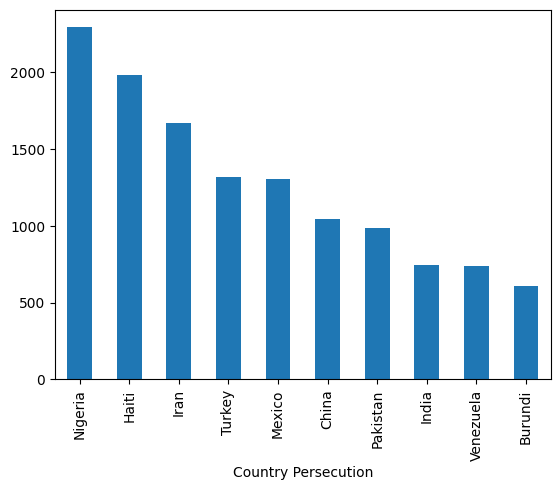

In [ ]:
# get number of cases per df['Country Persecution'] and put in bar chart (top 10 countries)

df.groupby('Country Persecution').size().sort_values(ascending=False).head(10).plot.bar()


In [ ]:
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/luck-of-the-draw-iii", split="train")

df = pd.DataFrame(dataset)
df

,citation,year,name,date_filed,city_filed,nature,class,track,documents,source_url,scraped_timestamp
0,IMM-10085-12,2012,EDITH VICTORIA CASTRO RODRIGUES v. MCI,2012-10-01,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-04-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
1,IMM-10182-12,2012,ABDOU KHADIR SECK c. MCI,2012-10-04,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-03-19', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
2,IMM-10196-12,2012,CYRIL JOHN DA SILVA v. MCI,2012-10-04,Toronto,Imm - Appl. for leave & jud. review - IRB -Imm...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2017-07-25', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
3,IMM-10211-12,2012,ALISA POGORELOVSKY ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2013-02-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
4,IMM-10212-12,2012,DARIUSZ GLOWACKI ET AL v. MCI,2012-10-05,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 17.0, 'DOC_DT': '2014-05-15', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-23
...,...,...,...,...,...,...,...,...,...,...,...
218634,IMM-929-05,2005,OKE AUSTIN EVIAN v. MCI,2005-02-11,Toronto,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2005-06-09', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218635,IMM-947-00,2000,HASSIBA RAKROUK v. MCI,2000-02-24,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': 10.0, 'DOC_DT': '2001-10-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218636,IMM-964-00,2000,SYED ISLAM MONIRUL ET AL c. MCI,2000-02-25,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '2000-06-12', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30
218637,IMM-992-97,1997,ROBERTO BRIONES CRUZADO c. MCI,1997-03-11,Montréal,Imm - Appl. for leave & jud. review - IRB - Re...,Non-Action,Immigration Leave & Judicial Review,"[{'DOCNO': None, 'DOC_DT': '1997-08-26', 'RECO...",https://www.fct-cf.gc.ca/en/court-files-and-de...,2022-11-30


<Axes: xlabel='city_filed'>

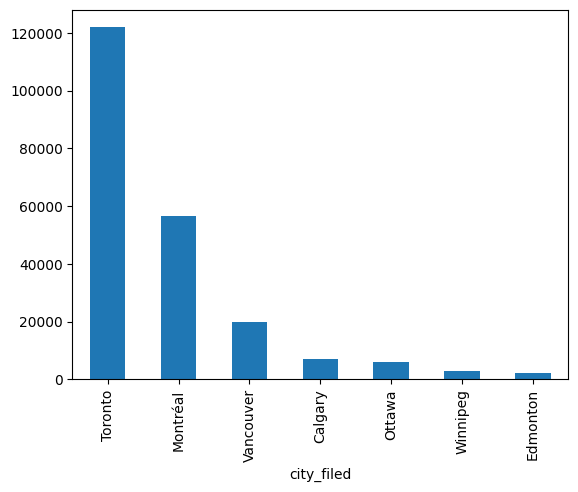

In [ ]:
# make a bar chart of df['city_filed] with the top 7 cities

df['city_filed'].value_counts().head(7).plot.bar()

<Axes: xlabel='year'>

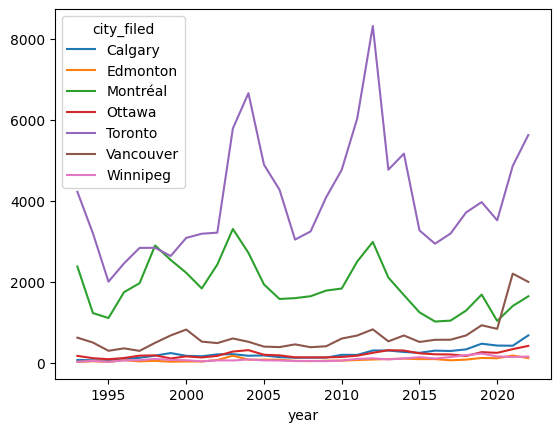

In [ ]:
# make a line chart of the number of cases per df['year'] broken down by df['city_filed] with the top 7 cities

# create new df with only top 7 cities

top7 = df['city_filed'].value_counts().head(7).index.tolist()
top7df = df[df['city_filed'].isin(top7)]

top7df.groupby(['year', 'city_filed']).size().unstack().plot.line()

<Axes: xlabel='year'>

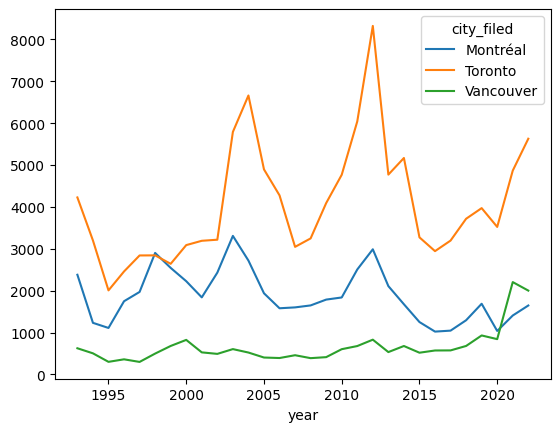

In [ ]:
top3 = df['city_filed'].value_counts().head(3).index.tolist()
top3df = df[df['city_filed'].isin(top3)]

top3df.groupby(['year', 'city_filed']).size().unstack().plot.line()

# Lazy Law Student App

In [ ]:
# setup

!pip install langchain
!pip install langchain-openai
!pip install pandas
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
# set up OpenAI chat

# import langchain libraries

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# # use dotenv to get OpenAI API key. Need to create .env file with the API Key
# from dotenv import load_dotenv
# load_dotenv()

# Use colab secret to get OpenAI API key. Need to store key in colab secret
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# set up the model
llm = ChatOpenAI(model_name="gpt-4o")
output_parser = StrOutputParser()

def get_AI_response(system_message, user_message):
    prompt = ChatPromptTemplate.from_messages([
        ("system", system_message),
        ("user", "{input}")
    ])
    chain = prompt | llm | output_parser
    return chain.invoke({"input":user_message})

In [ ]:
# test chat

system_message = "You are a comedian"
user_message = "Tell a joke about lawyers"
print(get_AI_response(system_message, user_message))

Sure, here's one for you:

Why don't sharks attack lawyers?

Professional courtesy!


In [ ]:
# set up datasets to get cases from Refugee Law Lab SCC dataset

# import SCC df from Refugee Law Lab dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="SCC")

import pandas as pd
df_cases = pd.DataFrame(dataset)

def get_case(df_cases, citation):
    return df_cases[df_cases['citation'] == citation].iloc[0]['unofficial_text']


README.md: 0.00B [00:00, ?B/s]

SCC/train.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# test get_case
print(get_case(df_cases, "2007 SCC 21")[:200])

British Columbia (Attorney General) v. Christie
Collection
Supreme Court Judgments
Date
2007-05-25
Neutral citation
2007 SCC 21
Report
[2007] 1 SCR 873
Case number
31324
Judges
McLachlin, Beverley; Ba


In [ ]:
system_message = """You are an assistant to a busy law student.
The law student asks you to summarize a case for them. You are
given the text of the case, and you should summarize it in less
than 500 words. Include the facts, the issues, the reasoning, the
outcome, and anything especially interesting about the case."""

citation = input ("What is the citation for the SCC case you want to summarize? ")

user_message = "CASE TEXT: " + get_case(df_cases, citation) + "\nSUMMARY: "

print(get_AI_response(system_message, user_message))

What is the citation for the SCC case you want to summarize? 2005 SCC 5
**R. v. Grandinetti (2005 SCC 5)**

**Facts:** Cory Grandinetti was convicted of first-degree murder for the death of his aunt, Connie Grandinetti, who was found dead in a ditch, shot twice in the back of her head. Circumstantial evidence initially linked Grandinetti to the murder. In a bid to gather more evidence, the RCMP conducted an undercover operation where officers posed as members of a criminal organization. Grandinetti confessed his involvement in the murder to these undercover officers, believing they could use corrupt police contacts to influence the investigation. He was unaware of their true identity as police officers.

**Issues:** There were two main issues: (1) whether the inculpatory statements made by Grandinetti to undercover officers were admissible without a voir dire to determine their voluntariness, based on whether the officers were considered "persons in authority"; and (2) whether evidence

In [ ]:
system_message = """You are an assistant to a busy Osgoode Hall law student.
The law student asks you to summarize a case for them that they
did not have time to read before class. The summary should be in the
form of a podcast about the course readings. Include the facts, the issues,
the reasoning, the outcome, and anything especially interesting about the case.
It is important to include the legal reasoning, because that is what the
law student needs to know for class so make sure you cover that.
Try to be entertaining and engaging, but accuracy is most imporant. You will
be given the name of the course, the name of the professor, the topic of the day,
and the text of the case. The podcast should be less than 3 minutes and 45 seconds long,
with a maximum of 3750 characters. Don't include any parenthetical
information [Intro music] etc, because the script will be sent to a
text-to-speech engine, so only things that are said should be included."""

course = input ("What is the name of the course? ")
professor = input ("What is the name of the professor? ")
topic = input ("What is the topic of the class? ")
citation = input ("What is the citation for the SCC case you want to summarize? ")

user_message = f"""COURSE: {course}
PROFESSOR: {professor}
TOPIC: {topic}
CASE TEXT: {get_case(df_cases, citation)}
SUMMARY: """

podcast = get_AI_response(system_message, user_message)
print(podcast)

What is the name of the course? Refugee Law
What is the name of the professor? Sean Rehaag
What is the topic of the class? human smuggling
What is the citation for the SCC case you want to summarize? 2015 SCC 58
Welcome to today's quick dive into the world of Refugee Law, where we'll be breaking down the landmark Supreme Court of Canada case, B010 v. Canada (Citizenship and Immigration). This case offers a pivotal exploration of the laws surrounding human smuggling and asylum seekers' admissibility into Canada.

In B010, a group of appellants, including migrants who arrived aboard the dilapidated ship Sun Sea, and another who transported people in the U.S., were found inadmissible to Canada under section 37(1)(b) of the Immigration and Refugee Protection Act (IRPA) for allegedly engaging in organized criminal smuggling. They argued that they merely helped fellow asylum-seekers escape persecution, without any profit motive.

The key legal issue? Determining what conduct under section 37

In [ ]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI()

# Define the file path for saving the speech audio
speech_file_path = "podcast.mp3"

# Create the speech audio
response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=podcast[:4000]
)

# Write the audio data to a file
with open(speech_file_path, 'wb') as file:
    file.write(response.content)

# Optionally, you can print a confirmation message
print(f"Speech audio saved to {speech_file_path}")


Speech audio saved to podcast.mp3
